# Statistical Mechanics

## Dynamics of many particle systems

- **Goal:** Simulate the behavior of many particle systems and
  introduce basic ideas of equilibrium statistical mechanics.
- Many systems in nature such as gases, liquids and solids contain
  many mutually interacting particles.
- The computational challenge involves a prohibitive number of
  particles to model, e.g., a cup of coffee with $\sim 10^{24}$
  molecules.
- It is possible to model with ``macro'' particles and still gain
  insight into the collective behavior of the system.
- First specify a simple model of the intermolecular potential $V(r)$,
  e.g., treat dynamics classically and that the molecules are
  spherical and chemically inert.
- Force between molecules depends only on the distance between
  them.
- The potential energy $U$ is the sum of two-particle interactions, i.e., 
\begin{equation*}
U = V(r_{12}) + V(r_{13}) + \cdot \cdot \cdot + V(r_{23})+\cdot \cdot
\cdot = \sum_{i<j=1}^N V(r_{ij})
\end{equation*}
where ${\bf \rm r}_{ij}$ is the distance between particles.



## Molecular dynamics 

- The form of the intermolecular potential $V(r)$ can be
  constructed, in principle, by a detailed first principles quantum
  mechanics calculation.
- One of the most useful phenomenological forms of $V(r)$ is the
  Lennard-Jones potential
\begin{equation*}
V(r) = 4 \epsilon \left[\left( \frac{\sigma}{r} \right)^{12} -\left( \frac{\sigma}{r} \right)^{6}  \right]
\end{equation*}
where length $\sigma$ and energy $\epsilon$ are parameters. 
- Note that at $r=\sigma$, $V(r)= 0$.
- The parameter $\epsilon$ is the depth of the potential at the
  minimum in $V(r)$.
- The minimum occurs at $r = 2^{1/6} \sigma$.
- The potential is ``short-range'' and $V(r)$ is essentially zero
  for $r > 2.5 \sigma$.
- Strong repulsive force for small $r$ and weak attraction for
  large $r$.


- Use *Verlet algorithm*. Need a simple algorithm due to
  complexity of calculating acceleration for $N$-particle system.
\begin{eqnarray*}
x^{n+1} &=& x^n + v^n \Delta t + \frac{1}{2} a^n (\Delta t)^2\\
v^{n+1} & = & v^n + \frac{1}{2}(a^{n+1} + a^n) \Delta t
\end{eqnarray*}
- The velocity update can be split into two operations.  First a
  provisional velocity update is calculated,
\begin{equation*}
v^{n+1}  =  v^n + a^n \Delta t
\end{equation*}
followed by a provisional acceleration $a^{n+1}$ update.  The velocity is improved by calculating
\begin{equation*}
v^{n+1}  =  v^n + a^{n+1} \Delta t
\end{equation*}
- Adding these equations yields the expected algorithm
\begin{eqnarray*}
2 v^{n+1} & = & 2v^n + (a^{n+1} + a^n) \Delta t\\
v^{n+1} & = & v^n + \frac{1}{2}(a^{n+1} + a^n) \Delta t
\end{eqnarray*}

- The force is ${\rm \bf F} = -\boldsymbol{\nabla} V$.  If we treat each interaction as a 1-D interaction, then 
\begin{eqnarray*}
F &=& -\frac{d}{dr} V(r)\\
& =& - 24 \epsilon \left(\frac{\sigma}{r} \right)^5 \left(\frac{-\sigma}{r^2}\right)\left[\left( \frac{\sigma}{r} \right)^{6} -1 \right] - 24 \epsilon \left(\frac{\sigma}{r}\right)^6 \left[\left(\frac{-\sigma}{r^2} \right) \left(\frac{\sigma}{r} \right)^5\right] \\
& = & 24 \epsilon \left(\frac{1}{r}\right)\left(\frac{\sigma}{r} \right)^6 \left[2\left( \frac{\sigma}{r} \right)^{6} -1 \right] 
\end{eqnarray*}
- Introduce dimensionless variables $V  \rightarrow V/\epsilon$ and $r \rightarrow r/\sigma$.
- The potential energy $U$ is the sum of two-particle interactions, i.e., 
\begin{equation*}
U = V(r_{12}) + V(r_{13}) + \cdot \cdot \cdot + V(r_{23})+\cdot \cdot
\cdot = \sum_{i<j=1}^N V(r_{ij})
\end{equation*}
where ${\rm \bf r}_{ij}$ is the distance between particles.
- The average energy is
\begin{equation*}
\langle E \rangle = \frac{1}{2} m (\langle v^2 \rangle - \langle v \rangle^2)
\end{equation*}



## Maxwellian distribution

- A distribution function gives the number of particles per unit $dv_x dv_y dv_z$ and per unit volume.  In other words, density is determined by integrating over velocity space and the total number of particles is given by 
$$ N = \int f(x,y,z,v_x,v_y,v_z,t)dx dy dz dv_x dv_y dv_z$$
- For a uniform density we can consider $f(v_x,v_y,v_z)$, or in 1D $f(v)$.
- Monte Carlo methods - Cumulative distribution
\begin{equation*}
R_s(0 \rightarrow 1) = \frac{\int \limits_0^v f(v^\prime) d{v}^\prime}{\int
  \limits_0^\infty f(v^\prime) d{v}^\prime}
\end{equation*}
- Methods applicable to any separable continuous distribution
  function, $f(v_x)f(v_y)f(v_z)$.  Invert each component separately.
  
- Use a distribution function of the form
\begin{equation*}
f(v) \propto e^{-v^2/2v_{th}^2}
\end{equation*}
- In two dimensions $d{v} \rightarrow 2 \pi v dv$ and the integrals can
  be done explicitly (Box-Muller method).  The inversion for speeds $v$ in terms of a
  random number $R_s$ is
\begin{equation*}
v_s = v_{th} \sqrt{-2 \ln R_s}
\end{equation*}
or in terms to of independent velocity pairs 
\begin{equation*}
v_x \rightarrow v_{s,\theta} = v_{th}\sqrt{-2 \ln R_s} \cos 2 \pi R_\theta
\end{equation*}
\begin{equation*}
v_y \rightarrow v_{s,\theta} = v_{th}\sqrt{-2 \ln R_s} \sin 2 \pi R_\theta
\end{equation*}
where $\theta = \arctan(v_y/v_x)$





## Exercise 1: 

1. Examine the comment the code below.


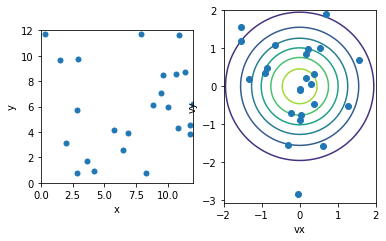

1.1608054447071436 0.4039511612618032 0.6355715233251118


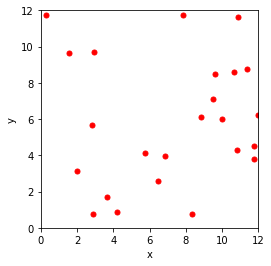

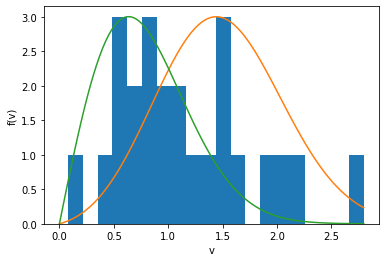

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from matplotlib import rc
rc('animation', html='jshtml')

class particles:  # Class to hold particle information
    
    # Initialization of particle variables struct 
    def __init__(self,N,vmax,Lx,Ly,dt,tfinal,sigma,epsilon):
        self.N = N
        self.x = np.random.rand(N)*Lx
        self.y = np.random.rand(N)*Ly
        self.vmax = vmax
        self.vx = (-1 + 2*np.random.rand(N))*vmax
        self.vy = (-1 + 2*np.random.rand(N))*vmax
        self.ax = np.zeros(N)
        self.ay = np.zeros(N)
        self.Lx = Lx
        self.Ly = Ly
        self.dt = dt
        self.tfinal = tfinal
        self.sigma = sigma
        self.epsilon = epsilon
        self.totalEnergy = []

# Monte Carlo Maxwellian Initialization.
def Maxwellian(p):  
    vs = p.vmax*np.sqrt(-2*np.log(np.random.rand(p.N)))
    rtheta = np.random.rand(p.N)
    p.vx = vs*np.cos(2*np.pi*rtheta)
    p.vy = vs*np.sin(2*np.pi*rtheta)
    return
    
# Initialization function for Excercise 2: Part 1
def oneSideInit(p):
    vs = 0.1*p.vmax
    rtheta = np.random.rand(p.N)
    p.vx = p.vmax + vs*np.cos(2*np.pi*rtheta)
    p.vy = 0 + vs*np.sin(2*np.pi*rtheta)

# Plots particles in positional space alongside a 
#   2D velocity plot centered around the max of the velocities
def plot_particles(p):
    def max_func(p,vx,vy):
        F = np.exp(-(vx**2 + vy**2)/(2*p.vmax**2))
        return F
    fig, ax = plt.subplots(1,2)
    ax[0].plot(p.x,p.y,'o',markersize=5.0)
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')
    ax[0].set_xlim([0,p.Lx])
    ax[0].set_ylim([0,p.Ly])
    ax[0].set_aspect('equal')
    ax[1].plot(p.vx,p.vy,'o')
    ax[1].set_xlabel('vx')
    ax[1].set_ylabel('vy')
    ax[1].set_aspect('equal')
    vx = np.linspace(-p.vmax*2, p.vmax*2, 50)
    vy = np.linspace(-p.vmax*2, p.vmax*2, 50)
    vX, vY = np.meshgrid(vx, vy)
    Z = max_func(p,vX, vY)
    ax[1].contour(vX,vY,Z)
    plt.show()

# Plot a slice of the 2D velocity distribution
def plot_distribution(p):
    plt.figure(2)
    vbar, vbar2, dv2 = mean_v(p)
    print(vbar,dv2,np.sqrt(dv2))
    h = plt.hist(np.sqrt(p.vx**2 + p.vy**2),bins=20,density=False)
    v = np.linspace(0,max(np.sqrt(p.vx**2 + p.vy**2)),100)
    fv = v*np.exp(-(v-vbar)**2/(2*dv2))
    fv1 = v*np.exp(-(v)**2/(2*dv2))
    plt.plot(v,fv*np.max(h[0])/np.max(fv))
    plt.plot(v,fv1*np.max(h[0])/np.max(fv1))
    plt.xlabel('v')
    plt.ylabel('f(v)')
    plt.show()
    return

# Function for the force on any given particle
def Force(p,r,dx,dy):
    ri = sigma/r
    ri3 = ri**3
    ri6 = ri3**2
    F = 24*epsilon*ri6*(2*ri6 - 1)/r
    if (F > 100.0):
        F = 100.0
    return F

# Function that creates periodic boundary conditions
def periodic(p):
    p.x[p.x < 0] = p.x[p.x < 0] + p.Lx
    p.y[p.y < 0] = p.y[p.y < 0] + p.Ly
    p.x[p.x > p.Lx] = p.x[p.x > p.Lx] - p.Lx 
    p.y[p.y > p.Ly] = p.y[p.y > p.Ly] - p.Ly 
    return

# Flips the sign of the separation of the particles if it goes over to the other side
# Used in acceleration function
def separation(p,dx,dy):
    if (abs(dx) > 0.5*p.Lx):
        dx = dx - np.sign(dx)*p.Lx
    if (abs(dy) > 0.5*p.Ly):
        dy = dy - np.sign(dy)*p.Ly
    return dx, dy

# Uses the force function to calculate the acceleration on the particles.  
def Accel(p):
    p.ax = np.zeros(p.N)
    p.ay = np.zeros(p.N)
    for i in range(p.N-1):        
        for j in range(i+1,p.N):
            dx = p.x[i] - p.x[j]
            dy = p.y[i] - p.y[j]
            dx, dy = separation(p,dx,dy)
            r = np.sqrt(dx*dx + dy*dy)
            F = Force(p,r,dx,dy)
            p.ax[i] = p.ax[i] + F*dx
            p.ay[i] = p.ay[i] + F*dy
            p.ax[j] = p.ax[j] - F*dx  #Newton's third law
            p.ay[j] = p.ay[j] - F*dy
    return

# The Verlet algorithm, used for updating the state of the particles
def Verlet(p):
    p.x = p.x + p.vx*dt + 0.5*p.ax*p.dt**2
    p.y = p.y + p.vy*dt + 0.5*p.ay*p.dt**2
    p.vx = p.vx + 0.5*p.ax*p.dt
    p.vy = p.vy + 0.5*p.ay*p.dt
    periodic(p)
    Accel(p)
    p.vx = p.vx + 0.5*p.ax*p.dt
    p.vy = p.vy + 0.5*p.ay*p.dt
    return

# Plots an animation of the position of the particles 
def move_particles_anim(p,nstep): 
    nfrm = 0
    time = 0
    cnt = 0
    fig, ax = plt.subplots()
    line, = ax.plot([], [], 'r.', markersize=10)
    ax.set_aspect('equal')
    ax.set_ylim(0,p.Ly)
    ax.set_xlim(0,p.Lx)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    xdata = []
    ydata = []
    def update_line(i):
        line.set_ydata(ydata[i])
        line.set_xdata(xdata[i])
        return line,
    while time < p.tfinal:
        Verlet(p)
        time += p.dt
        energy(p)
        cnt += 1
        if (cnt == nstep):
            xdata.append(p.x)
            ydata.append(p.y)
            nfrm += 1
            cnt = 0
    ani = animation.FuncAnimation(fig, update_line, frames=nfrm, interval=10, blit=True, repeat=True, cache_frame_data=True)
    return ani

# Fucntions to calculate the mean and variance
def mean_v(p):
    v = np.sqrt(p.vx**2 + p.vy**2)
    vbar = np.sum(v)/p.N              # Mean
    vbar2 = np.sum(v**2)/p.N        
    dv2 = vbar2 - vbar**2             # Variance
    return vbar,vbar2,dv2

def mean_vx(p):
    vx = p.vx
    vxbar = np.sum(vx)/(p.N/2)        # Mean
    vxbar2 = np.sum(vx**2)/(p.N/2)        
    dvth2 = vxbar2 - vxbar**2         # Variance
    return vxbar,vxbar2,dvth2

def mean_vy(p):
    vy = p.vy
    vybar = np.sum(vy)/(p.N/2)        # Mean
    vybar2 = np.sum(vy**2)/(p.N/2)        
    dvth2 = vybar2 - vybar**2         # Variance
    return vybar,vybar2,dvth2

# Function to calculate the mean energy in the system
def energy(p):
    p.totalEnergy.append(np.sum(p.vx**2 + p.vy**2))

def plot_energy(p):
    time = np.arange(0, p.tfinal, p.dt)
    plt.figure()
    plt.plot(time, p.totalEnergy)
    plt.xlabel("Time (s)")
    plt.ylabel("Energy in the System (J)")
#------------------------------------------------------------------------------------

N = 24        # Number of particles
Lx = 12       # X size of box
Ly = 12       # Y size of box
sigma = 0.5   # Close interaction length scale
epsilon = 1.0 # Depth of potential well
m = 1.0       # Mass
dt = 0.002                        # Time step
tfinal=dt*200                     # Final time
vmax = 1.0*np.sqrt(epsilon/m)     # Non dimensional thermal velocity

p = particles(N,vmax,Lx,Ly,dt,tfinal,sigma,epsilon)  # Initiate data structure
Maxwellian(p)            # Initialize particles with Maxwellian velocity distribution based on vmax.
plot_particles(p)        # Plot distribution
nstep = 2                # Number of time steps between animation frames.
ani = move_particles_anim(p,nstep)  # Run the simulation
plot_distribution(p)     # Examine velocity distribution.
ani

## Exercise 2: Initializing a Maxwellian distribution

Consider $N$ = 24 particles interacting via the Lennard-Jones potential in a box of linear dimensions $L_x = L_y = 12$.  Suppose the particles are constrained to be in the left half of the box.  At $t=0$ the constraint is removed and the particles move freely throughout the entire box.  

1. In the left half of the box, initialize particles with $v_{max} = 1.0$ in the $x$ direction (*directed flow*) and a small thermal velocity, e.g., $0.1 v_{max}$. 

2. Plot the distribution of particles as a scatter plot of $v_y vs. v_x$.

3. Plot the distribution using a histogram function and compare with a drifting *Maxwellian*, i.e., 
$$ f(v_x) \propto e^{-(v_x-\langle v_x \rangle)^2/(2 v_{th,x}^2)}$$
where $v_{th,x}^2 = \langle v_x^2 \rangle - \langle v_x \rangle^2$.


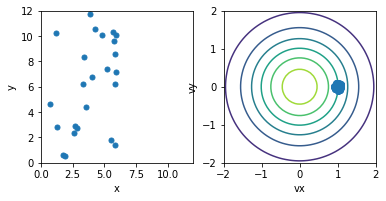

1.6172622734663744 0.7970574584898098 0.8927807449143433


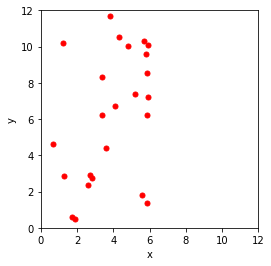

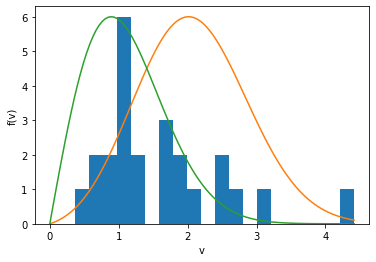

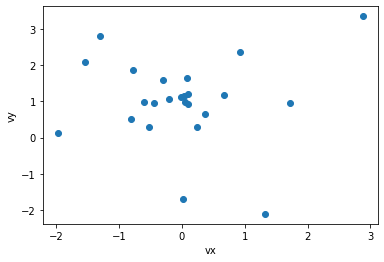

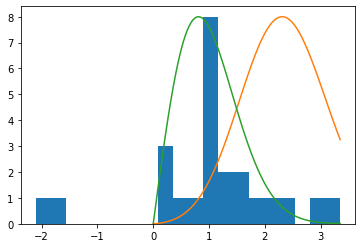

In [5]:
# E2 - Part 1: -----------------------------------------------------------------
N = 24                              # Number of particles
Lx = 12                             # X size of box
Ly = 12                             # Y size of box
sigma = 0.5                         # Close interaction length scale
epsilon = 1.0                       # Depth of potential well
m = 1.0                             # Mass
dt = 0.001                          # Time step
tfinal=dt*2000                      # Final time
vmax = 1.0*np.sqrt(epsilon/m)       # Non dimensional thermal velocity

p = particles(N,vmax,Lx,Ly,dt,tfinal,sigma,epsilon)  # Initiate data structure

p.x = 0.5*Lx*np.random.rand(N)
oneSideInit(p)                      # Initialization function I created

plot_particles(p)                   # Plot distribution
nstep = 2                           # Number of time steps between animation frames.
ani = move_particles_anim(p,nstep)  # Run the simulation
plot_distribution(p)                # Examine velocity distribution.
ani
# ------------------------------------------------------------------------------

# E2 - Part 2: -----------------------------------------------------------------
plt.figure(3)
plt.scatter(p.vy, p.vx)
plt.xlabel('vx')
plt.ylabel('vy')

# vx and vy at tfinal.

# ------------------------------------------------------------------------------

# E2 - Part 3: -----------------------------------------------------------------

# I know that this isn't correct in terms of plotting the drifting Maxwellian
#     but I wasn't sure how to plot it where it could start below 0 for the
#     specific components.

plt.figure(4)
[vxbar, vxbar2, dvth2] = mean_vx(p)
vx = np.linspace(0,max(p.vx),100)
fvx = vx*np.exp(-(vx-vxbar)**2/(2*dvth2))
fvx1 = vx*np.exp(-(vx)**2/(2*dvth2))
h1 = plt.hist(p.vx,bins=20,density=False)
plt.plot(vx,fvx*np.max(h1[0])/np.max(fvx))
plt.plot(vx,fvx1*np.max(h1[0])/np.max(fvx1))
# ------------------------------------------------------------------------------

## Exercise 3: Approach to equilibrium of a dilute gas

Move the particles using $\Delta t = 0.002$ for $\sim$1000 time steps.  Generate an animation.

1. Does the system become more or less random? Estimate the time to equilibrium.

**It becomes more random, and if we have 48 particles with our dt = 0.002 then it takes about the full 1000 time steps to become somewhat random.**

2. Plot total energy as a function of time. Is energy conserved?  What happens when the Force is unbounded (see limit implemented in code)? 

**Sort of? It shoots up from around 50 to around a 200 - 350 range and fluctuates around those values**

3. Compare the particle distribution with the following functional forms
$$ f(v_x) \propto e^{-(v_x-\langle v_x \rangle)^2/(2 v_{th,x}^2)},$$

$$f(v_x) \propto e^{-(v_x)^2/(2 v_{th,x}^2)},$$
and
$$ f(v) \propto v e^{-(v)^2/(2 v_{th}^2)}.$$
Is the distribution consistent with a Maxwellian?

**In normal velocity space vx and vy space, yes.**

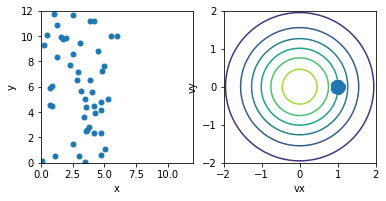

1.7154271117120448 1.1300349084739327 1.0630310007116126


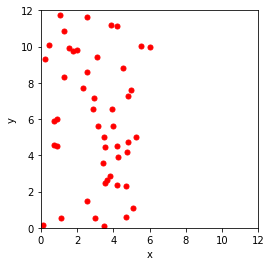

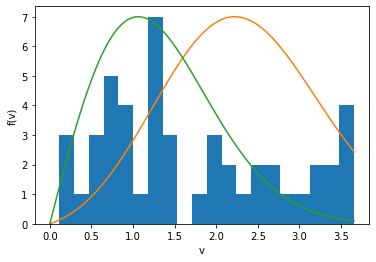

1.7154271117120448 1.1300349084739327 1.0630310007116126


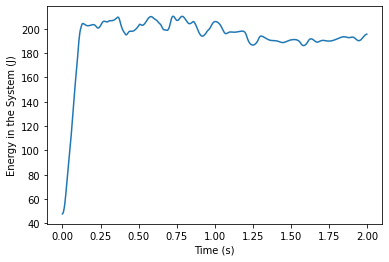

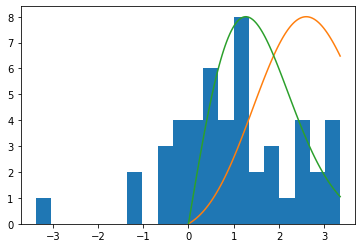

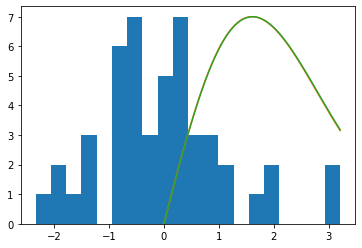

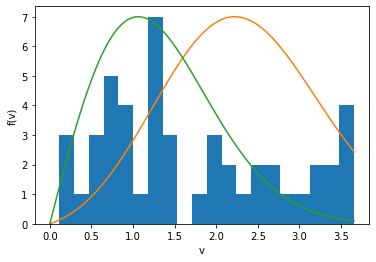

In [6]:
# E3 - Part 1: -----------------------------------------------------------------
N = 48                              # Number of particles
Lx = 12                             # X size of box
Ly = 12                             # Y size of box
sigma = 0.5                         # Close interaction length scale
epsilon = 1.0                       # Depth of potential well
m = 1.0                             # Mass
dt = 0.002                          # Time step
tfinal=dt*1000                      # Final time
vmax = 1.0*np.sqrt(epsilon/m)       # Non dimensional thermal velocity

p = particles(N,vmax,Lx,Ly,dt,tfinal,sigma,epsilon)  # Initiate data structure

p.x = 0.5*Lx*np.random.rand(N)
oneSideInit(p)                      # Initialization function I created

plot_particles(p)                   # Plot distribution
nstep = 2                           # Number of time steps between animation frames.
ani = move_particles_anim(p,nstep)  # Run the simulation
plot_distribution(p)                # Examine velocity distribution.
ani

plot_energy(p)                      # Plots the Energy per Time
# ------------------------------------------------------------------------------

# E3 - Part 2: -----------------------------------------------------------------

# I know that this isn't correct in terms of plotting the drifting Maxwellian
#     but I wasn't sure how to plot it where it could start below 0 for the 
#     specific components.

# X-Component
plt.figure(5)
[vxbar, vxbar2, dvth2] = mean_vx(p)
h1 = plt.hist(p.vx,bins=20,density=False)
vx = np.linspace(0,max(p.vx),100)
fvx = vx*np.exp(-(vx-vxbar)**2/(2*dvth2))
fvx1 = vx*np.exp(-(vx)**2/(2*dvth2))
plt.plot(vx,fvx*np.max(h1[0])/np.max(fvx))
plt.plot(vx,fvx1*np.max(h1[0])/np.max(fvx1))

# Total-Velocity
plot_distribution(p)
# ------------------------------------------------------------------------------



# Microcanonical ensemble

- Possible to simulate a system of many particles by integrating the equations of motions for each particle for a closed system (i.e., fixed number of particles $N$, volume $V$, and total energy $E$).

- The *macrostate* of the system is specified by $N$, $V$, and $E$.

- At the microscopic level there are in general a large number of different ways or *configurations* in which the *macrostate* ($N$, $V$, $E$) is realized.

- A particular configuration or *microstate* is *accessible* if its properties are consistent with the specified *macrostate*.

- The system is *equally* likely to be in any one of the accessible microstates.

- Physical quantities can be can be determined in one of two ways: 1) perform time averages of physical quantities (e.g., temperature and density) using a molecular dynamics simulation (giving the system time to access each microstate), 2) perform statistical averages at a given instant in time by imagining a collection or *ensemble* of systems characterized by the same *macrostate*.

- For *ensemble* averages the number of systems in the ensemble is equal to the number of *microstates*.

- An ensemble of systems specified by $N$, $V$, and $E$ is called the *microcanonical ensemble*.

- Molecular dynamics is a computationally intensive process (method 1).  How can be do an ensemble average at fixed $N$, $V$, and $E$?  Enumerating all of the microstates is not practical.  Instead use a Monte Carlo approach.

## Demon algorithm

- Develop a method of obtaining a representative sample of the total number of microstates.  

- Fix $N$ and $V$ and change the positions and velocities of the particles at random and retain the configuration if it has the desired total energy.  But this procedure is also inefficient.

- Instead, imagine a macroscopic system divided into two *subsystems*: 1) the system, 2) a subsystem with one member, or *demon*.  The purpose of the demon is to "travel around", transferring energy to affect dynamical variables of the system. The algorithm is summarized as follows:

  1. Choose a particle at random and change its coordinates.
  2. Compute the change in the energy of the system.
  3. If the trial change in energy decreases the system energy, the system gives the energy to the demon. Otherwise the trial is rejected.
  4. If the trial change in energy increases the system energy, the configuration is accepted if the demon as sufficient energy to give to the system.  Otherwise the trial is rejected.
  5. If the trial has no change in the system energy, the new configuration is accepted.
  
- The above procedure is repeated until a representative sample of states is obtained.

- How do we know that the demon algorithm is equivalent to the time-averaged molecular dynamics simulation? We don't but they have been found to yield equivalent results for all cases of practical interest.  *Ergodic* hypothesis is the assumption that the two averages yield equivalent results.


## Exercise 4:  One dimensional classical ideal gas

- Apply the demon algorithm.

- Particle velocities are continuous and unbounded. 

- Energy of a configuration is independent of the position of the particles.

- Total energy is the sum of the kinetic energies of the individual particles.

  1. Initialize the particles with the same velocity.  Choose the numerical values $N = 2000$, the total initial energy of the system = 10, the maximum change in velocity = 2, and the number of trials = [10,20,50].

  2. What is the initial mean velocity per particle?  What is the equilibrium value for the mean velocity per particle?

  3. The Monte Carlo simulation of the microcanonical ensemble is done at fixed total energy with no reference to temperature!  Define temperature by $\frac{1}{2} m \langle v^2 \rangle = \frac{1}{2} k_B T_{kin}$, where $\frac{1}{2} m \langle v^2 \rangle$ is the mean kinetic energy per particle.  Set Boltzmann's constant $k_B$ equal to unity.  Use this relation to obtain $T_{kin}$.  Is $T_{kin}$ related to the demon energy?


mean demon energy.............. 0.010697502775212973
mean system energy............. 29.994008641912018
mean velocity.................. -1.5578195692402108e-05
Average temperature, k_B*T/m... 0.005997860256764776


Text(0, 0.5, 'f(v)')

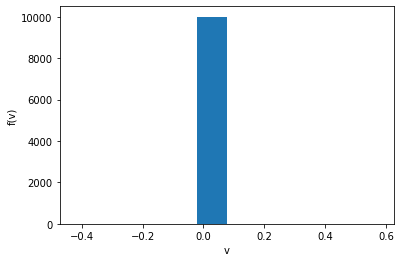

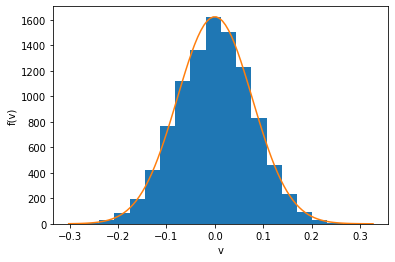

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class demon:
    def __init__(self,N, Esys, dvmax):
        self.N = N
        self.Esys = Esys
        self.Edemon = 0.0
        self.vinit = np.sqrt(2*Esys/N)
        self.v = np.ones(N)*np.sqrt(2*Esys/N)
        self.vtot = N*self.vinit
        self.dvmax = dvmax
        self.Edemon_run = 0.0
        self.Esys_run = 0.0
        self.v_run = 0.0
        
def demon_changes(d):
    for i in range(d.N):
        dv = (2*np.random.rand() - 1)*d.dvmax
        ipart = int(np.random.rand()*d.N)
        vtrial = d.v[ipart] + dv
        dE = 0.5*(vtrial**2 - d.v[ipart]**2)
        if dE <= d.Edemon:
            d.v[ipart] = vtrial
            d.vtot = d.vtot + dv
            d.Edemon = d.Edemon - dE
            d.Esys = d.Esys + dE
        d.Edemon_run += d.Edemon
        d.Esys_run += d.Esys
        d.v_run += d.vtot
    return

def averages(d,nstep):
    norm = 1/(nstep*d.N)
    Edemon_ave = d.Edemon*norm
    Esys_ave = d.Esys_run*norm
    v_ave = np.mean(d.v)
    v2_bar = np.mean(d.v**2)
    v_bar = np.mean(d.v)
    T = v2_bar - v_bar**2
    print('mean demon energy..............',d.Edemon)
    print('mean system energy.............',Esys_ave)
    print('mean velocity..................',v_ave)
    print('Average temperature, k_B*T/m...',T)
    return T

#-------------------------------------------------------------------------------

N = 10000
Esys = 30
dvmax = 5
nstep = 10000

d = demon(N, Esys,dvmax)

plt.figure()
plt.hist(d.v)
plt.xlabel('v')
plt.ylabel('f(v)')

for i in range(nstep):
    demon_changes(d)
    
T = averages(d,nstep)

plt.figure()
h = plt.hist(d.v,bins=20)
v = np.linspace(min(d.v),max(d.v),100)
plt.plot(v,np.max(h[0])*np.exp(-v**2/(2*T)))
plt.xlabel('v')
plt.ylabel('f(v)')

# Really cool.